# Numpy (conntinuación)

In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

##  Valores y vectores propios

In [6]:
M=np.array([[1,2,3],
           [0,1,0],
           [3,0,2]])

In [7]:
M

array([[1, 2, 3],
       [0, 1, 0],
       [3, 0, 2]])

In [8]:
np.linalg.eig(M)

(array([-1.54138127,  4.54138127,  1.        ]),
 array([[-0.76301998, -0.6463749 ,  0.18181818],
        [ 0.        ,  0.        ,  0.81818182],
        [ 0.6463749 , -0.76301998, -0.54545455]]))

In [9]:
val, vec = np.linalg.eig(M)

In [10]:
val

array([-1.54138127,  4.54138127,  1.        ])

In [11]:
vec

array([[-0.76301998, -0.6463749 ,  0.18181818],
       [ 0.        ,  0.        ,  0.81818182],
       [ 0.6463749 , -0.76301998, -0.54545455]])

In [12]:
# Los vectores propios son las columnas y no las filas

In [13]:
vec_T=vec.T

In [14]:
vec_T

array([[-0.76301998,  0.        ,  0.6463749 ],
       [-0.6463749 ,  0.        , -0.76301998],
       [ 0.18181818,  0.81818182, -0.54545455]])

In [24]:
M@vec_T[2]

array([ 0.18181818,  0.81818182, -0.54545455])

In [26]:
val[2]*vec_T[2]

array([ 0.18181818,  0.81818182, -0.54545455])

## Ejemplo
Un campo eléctrico está dado por $\vec{E}(z,t) = E_0 \cos (z-t) \hat{i} + 2E_0 \cos(z-t+\pi/2) \hat{j}$. 

1. Encuentre el campo magnético para todo $z en \in [0,4\pi]$ y $t \in [0,10]$ usando $c\vec{B}(z,t) = \hat{k} \times \vec{E}(z,t)$
2. Encuentre el vector de Poynting $\vec{S} = \vec{E} \times \vec{B}$ para todo $z$ y $t$

In [28]:
#Asumiento E0=1 N/C

In [29]:
z=np.linspace(0, 4*np.pi, 100)
t=np.linspace(0,10,100)

In [30]:
tt, zz = np.meshgrid(t, z)

In [31]:
Ex = np.cos(zz-tt)
Ey=2*np.cos(zz-tt+np.pi/2)

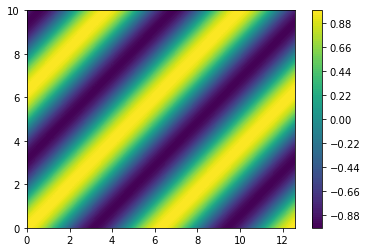

In [33]:
plt.contourf(zz, tt, Ex, levels=100)
plt.colorbar()

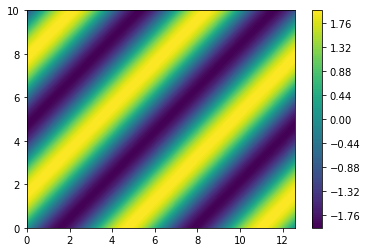

In [35]:
plt.contourf(zz, tt, Ey, levels=100)
plt.colorbar()

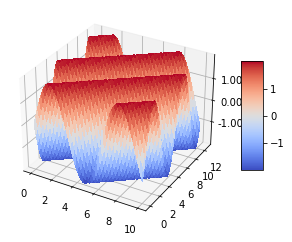

In [42]:
from matplotlib import cm

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.

# Plot the surface.
surf = ax.plot_surface(tt, zz, Ey, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
#ax.set_zlim(-1.01, 1.01)
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [41]:
%matplotlib inline

Ex y Ey como función de t en z=0

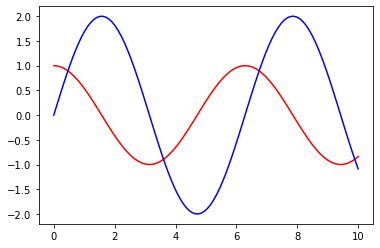

In [37]:
plt.plot(t,Ex[0], 'r')
plt.plot(t,Ey[0], 'b')

In [43]:
#1
Ez=0*zz

In [45]:
E=np.array([Ex, Ey, Ez])

In [46]:
E

array([[[ 1.00000000e+00,  9.94902816e-01,  9.79663226e-01, ...,
         -9.31164735e-01, -8.89652856e-01, -8.39071529e-01],
        [ 9.91954813e-01,  9.99664020e-01,  9.97182283e-01, ...,
         -9.69828789e-01, -9.40302293e-01, -9.01190009e-01],
        [ 9.67948701e-01,  9.88340255e-01,  9.98656304e-01, ...,
         -9.92887934e-01, -9.75821913e-01, -9.48808004e-01],
        ...,
        [ 9.67948701e-01,  9.37689522e-01,  8.97871191e-01, ...,
         -8.09751458e-01, -7.46454741e-01, -6.75548390e-01],
        [ 9.91954813e-01,  9.74133253e-01,  9.46381021e-01, ...,
         -8.77517892e-01, -8.24688573e-01, -7.63452074e-01],
        [ 1.00000000e+00,  9.94902816e-01,  9.79663226e-01, ...,
         -9.31164735e-01, -8.89652856e-01, -8.39071529e-01]],

       [[ 1.22464680e-16,  2.01676841e-01,  4.01297713e-01, ...,
         -7.29197467e-01, -9.13274975e-01, -1.08804222e+00],
        [-2.53184907e-01, -5.18400645e-02,  1.50033255e-01, ...,
         -4.87574080e-01, -6.80680831e

In [47]:
k=np.array([0,0,1])

In [51]:
E_T=E.T

In [52]:
E_T

array([[[ 1.00000000e+00,  1.22464680e-16,  0.00000000e+00],
        [ 9.91954813e-01, -2.53184907e-01,  0.00000000e+00],
        [ 9.67948701e-01, -5.02295974e-01,  0.00000000e+00],
        ...,
        [ 9.67948701e-01,  5.02295974e-01,  0.00000000e+00],
        [ 9.91954813e-01,  2.53184907e-01,  0.00000000e+00],
        [ 1.00000000e+00,  1.10218212e-15,  0.00000000e+00]],

       [[ 9.94902816e-01,  2.01676841e-01,  0.00000000e+00],
        [ 9.99664020e-01, -5.18400645e-02,  0.00000000e+00],
        [ 9.88340255e-01, -3.04522843e-01,  0.00000000e+00],
        ...,
        [ 9.37689522e-01,  6.94948515e-01,  0.00000000e+00],
        [ 9.74133253e-01,  4.51948690e-01,  0.00000000e+00],
        [ 9.94902816e-01,  2.01676841e-01,  0.00000000e+00]],

       [[ 9.79663226e-01,  4.01297713e-01,  0.00000000e+00],
        [ 9.97182283e-01,  1.50033255e-01,  0.00000000e+00],
        [ 9.98656304e-01, -1.03645294e-01,  0.00000000e+00],
        ...,
        [ 8.97871191e-01,  8.80516495e-01,

In [49]:
c=3E8

In [53]:
B=np.cross(k,E_T)/c

In [54]:
B

array([[[-4.08215600e-25,  3.33333333e-09,  0.00000000e+00],
        [ 8.43949690e-10,  3.30651604e-09, -0.00000000e+00],
        [ 1.67431991e-09,  3.22649567e-09, -0.00000000e+00],
        ...,
        [-1.67431991e-09,  3.22649567e-09,  0.00000000e+00],
        [-8.43949690e-10,  3.30651604e-09,  0.00000000e+00],
        [-3.67394040e-24,  3.33333333e-09,  0.00000000e+00]],

       [[-6.72256135e-10,  3.31634272e-09,  0.00000000e+00],
        [ 1.72800215e-10,  3.33221340e-09, -0.00000000e+00],
        [ 1.01507614e-09,  3.29446752e-09, -0.00000000e+00],
        ...,
        [-2.31649505e-09,  3.12563174e-09,  0.00000000e+00],
        [-1.50649563e-09,  3.24711084e-09,  0.00000000e+00],
        [-6.72256135e-10,  3.31634272e-09,  0.00000000e+00]],

       [[-1.33765904e-09,  3.26554409e-09,  0.00000000e+00],
        [-5.00110850e-10,  3.32394094e-09,  0.00000000e+00],
        [ 3.45484315e-10,  3.32885435e-09, -0.00000000e+00],
        ...,
        [-2.93505498e-09,  2.99290397e-09,

In [55]:
S=np.cross(E_T,B)

In [56]:
S

array([[[ 0.00000000e+00, -0.00000000e+00,  3.33333333e-09],
        [ 0.00000000e+00,  0.00000000e+00,  3.49358983e-09],
        [ 0.00000000e+00,  0.00000000e+00,  3.96408645e-09],
        ...,
        [ 0.00000000e+00, -0.00000000e+00,  3.96408645e-09],
        [ 0.00000000e+00, -0.00000000e+00,  3.49358983e-09],
        [ 0.00000000e+00, -0.00000000e+00,  3.33333333e-09]],

       [[ 0.00000000e+00, -0.00000000e+00,  3.43501720e-09],
        [ 0.00000000e+00,  0.00000000e+00,  3.34005181e-09],
        [ 0.00000000e+00,  0.00000000e+00,  3.56516874e-09],
        ...,
        [ 0.00000000e+00, -0.00000000e+00,  4.54071693e-09],
        [ 0.00000000e+00, -0.00000000e+00,  3.84397738e-09],
        [ 0.00000000e+00, -0.00000000e+00,  3.43501720e-09]],

       [[ 0.00000000e+00, -0.00000000e+00,  3.73593297e-09],
        [ 0.00000000e+00, -0.00000000e+00,  3.38960828e-09],
        [ 0.00000000e+00,  0.00000000e+00,  3.36018920e-09],
        ...,
        [ 0.00000000e+00, -0.00000000e+00,

In [57]:
#Graficar Sz

In [58]:
S_T=S.T

In [59]:
S_T

array([[[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        ...,
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

       [[-0.00000000e+00, -0.00000000e+00, -0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00, -0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e

In [61]:
Sx, Sy, Sz = S_T

In [64]:
Sz

array([[3.33333333e-09, 3.43501720e-09, 3.73593297e-09, ...,
        4.66265570e-09, 5.41851128e-09, 6.29292302e-09],
       [3.49358983e-09, 3.34005181e-09, 3.38960828e-09, ...,
        3.92765454e-09, 4.49164932e-09, 5.21189901e-09],
       [3.96408645e-09, 3.56516874e-09, 3.36018920e-09, ...,
        3.47506884e-09, 3.81104928e-09, 4.33096705e-09],
       ...,
       [3.96408645e-09, 4.54071693e-09, 5.27160658e-09, ...,
        6.77635910e-09, 7.76138653e-09, 8.76967706e-09],
       [3.49358983e-09, 3.84397738e-09, 4.37696297e-09, ...,
        5.63295683e-09, 6.53222091e-09, 7.50474263e-09],
       [3.33333333e-09, 3.43501720e-09, 3.73593297e-09, ...,
        4.66265570e-09, 5.41851128e-09, 6.29292302e-09]])

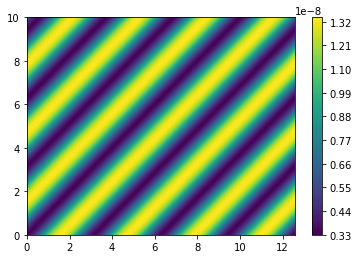

In [66]:
plt.contourf(zz, tt, Sz, levels=100)
plt.colorbar()

## Importar data

In [68]:
a=np.loadtxt(fname='temperatura_1.csv', delimiter=',')

In [69]:
a.shape

(24, 30)

In [ ]:
#Las columnas representan mediciones de temperatura por día
#Las filas representan mediciones de temperatura por hora

In [70]:
#Calcular el promedio de temperaturas en el primer día

In [72]:
a[:,0].mean()

0.0

In [73]:
#Calcular el promedio de temperaturas en el segundo día
a[:,1].mean()

0.4583333333333333

In [74]:
#Calcular el promedio de cada día

In [76]:
for i in range(30):
    b=a[:,i].mean()
    print(b, end='  ')

0.0  0.4583333333333333  1.0416666666666667  1.4583333333333333  2.2083333333333335  2.7916666666666665  3.4166666666666665  3.6666666666666665  5.458333333333333  5.583333333333333  5.208333333333333  5.75  8.5  7.833333333333333  8.333333333333334  9.25  9.208333333333334  10.875  11.333333333333334  12.041666666666666  12.583333333333334  12.875  11.416666666666666  9.166666666666666  9.416666666666666  8.791666666666666  8.791666666666666  7.208333333333333  7.458333333333333  7.166666666666667  

In [79]:
#Promediando cada columna
c=a.mean(axis=0)

In [ ]:
#Promediando cada fila
#a.mean(axis=1)

In [78]:
#Graficar el promedio de temperaturas vs día

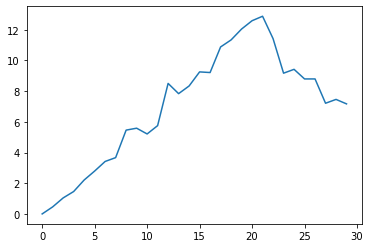

In [80]:
plt.plot(c)